Starting the search for N using Chebyshev nodes...
N = 10, Current max error = 1.0915e-01
N = 20, Current max error = 1.5334e-02
N = 30, Current max error = 2.0616e-03
N = 40, Current max error = 2.8946e-04
N = 50, Current max error = 3.9647e-05
N = 60, Current max error = 5.4165e-06
N = 70, Current max error = 7.4702e-07
N = 80, Current max error = 1.0228e-07
N = 90, Current max error = 1.4022e-08
N = 100, Current max error = 1.9258e-09
N = 110, Current max error = 2.6376e-10

-------------------------------------------
Calculation finished! Total time: 0.20 seconds
The minimum N found is: 116
Corresponding number of nodes (N+1) is: 117
The maximum error is: 8.0077e-11 (which is less than 1e-10)
-------------------------------------------



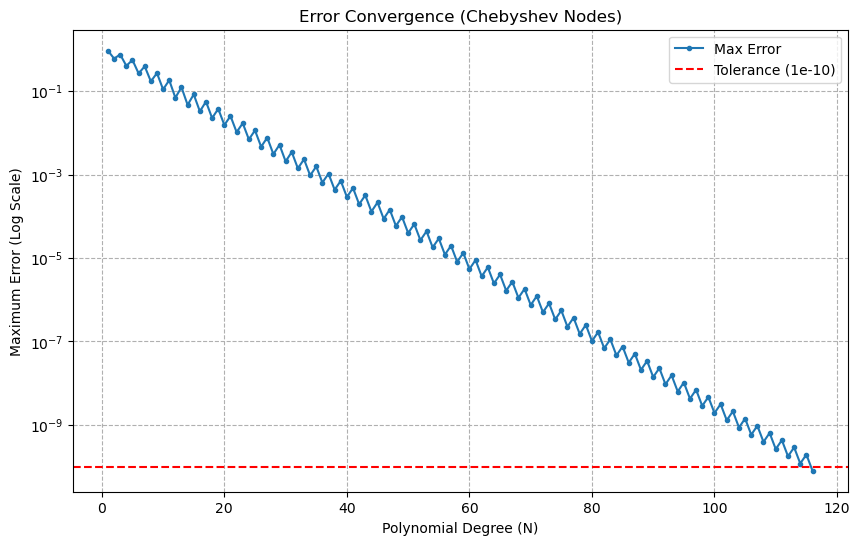

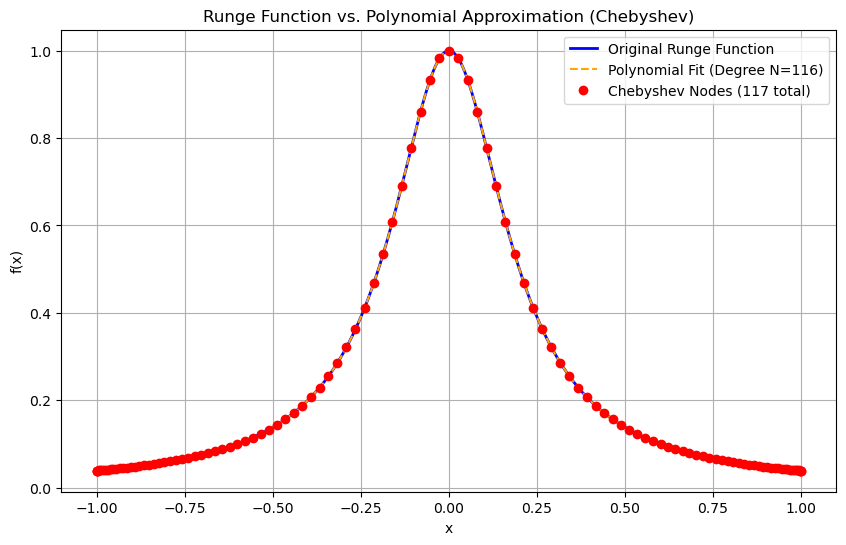

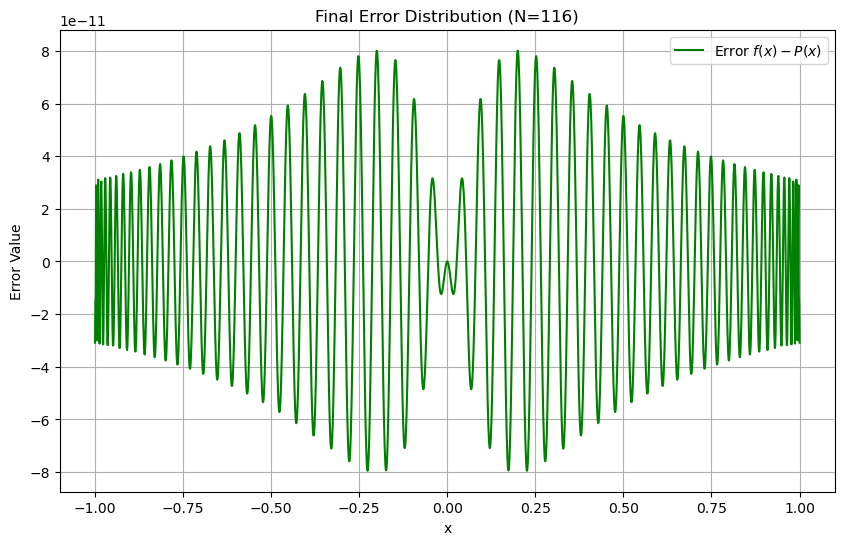

In [1]:
import numpy as np
from scipy.interpolate import BarycentricInterpolator
import matplotlib.pyplot as plt
import time

def runge(x):
    return 1 / (1 + 25 * x**2)

def chebyshev_nodes(N):
    k = np.arange(N + 1)
    nodes = np.cos((2 * k + 1) * np.pi / (2 * (N + 1)))
    return np.sort(nodes)

tol = 1e-10
N = 1
N_values = []
error_values = []

print("Starting the search for N using Chebyshev nodes...")
start_time = time.time()

while True:
    x_nodes = chebyshev_nodes(N)
    y_nodes = runge(x_nodes)
    
    p = BarycentricInterpolator(x_nodes, y_nodes)
    
    x_test = np.linspace(-1, 1, 2000)
    y_true = runge(x_test)
    y_pred = p(x_test)
    
    error = np.max(np.abs(y_true - y_pred))
    
    N_values.append(N)
    error_values.append(error)
    
    if N % 10 == 0:
        print(f"N = {N}, Current max error = {error:.4e}")

    if error < tol:
        break
    
    N += 1

end_time = time.time()

print("\n-------------------------------------------")
print(f"Calculation finished! Total time: {end_time - start_time:.2f} seconds")
print(f"The minimum N found is: {N}")
print(f"Corresponding number of nodes (N+1) is: {N + 1}")
print(f"The maximum error is: {error:.4e} (which is less than {tol})")
print("-------------------------------------------\n")


final_x_nodes = chebyshev_nodes(N)
final_y_nodes = runge(final_x_nodes)
final_p = BarycentricInterpolator(final_x_nodes, final_y_nodes)
final_x_test = np.linspace(-1, 1, 2000)
final_y_true = runge(final_x_test)
final_y_pred = final_p(final_x_test)
final_error_dist = final_y_true - final_y_pred

plt.figure(figsize=(10, 6))
plt.semilogy(N_values, error_values, '-o', markersize=3, label='Max Error')
plt.axhline(y=tol, color='r', linestyle='--', label=f'Tolerance ({tol})')
plt.title('Error Convergence (Chebyshev Nodes)')
plt.xlabel('Polynomial Degree (N)')
plt.ylabel('Maximum Error (Log Scale)')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(final_x_test, final_y_true, label='Original Runge Function', color='blue', linewidth=2)
plt.plot(final_x_test, final_y_pred, label=f'Polynomial Fit (Degree N={N})', color='orange', linestyle='--')
plt.plot(final_x_nodes, final_y_nodes, 'ro', label=f'Chebyshev Nodes ({N+1} total)')
plt.title('Runge Function vs. Polynomial Approximation (Chebyshev)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(final_x_test, final_error_dist, label='Error $f(x) - P(x)$', color='green')
plt.title(f'Final Error Distribution (N={N})')
plt.xlabel('x')
plt.ylabel('Error Value')
plt.grid(True)
plt.legend()
plt.show()